<a href="https://colab.research.google.com/github/sultanbst123/Kaggle_NBME---Score-Clinical-Patient-Notes/blob/main/Score_Clinical_Patient_Notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Score Clinical Patient Notes</h1>

##File & Library

In [ ]:
pip install mplcyberpunk

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from scipy.stats import *
import random

import os 
from zipfile import ZipFile

import seaborn as sns
from wordcloud import WordCloud 
import mplcyberpunk
import matplotlib.pyplot as plt
%matplotlib inline

#for ngrams text

from sklearn.feature_extraction.text import CountVectorizer

pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 1000)
import warnings 

warnings.filterwarnings("ignore")
plt.style.use("cyberpunk")

In [ ]:
mpl.rcParams["font.style"] = "italic"
mpl.rcParams["font.weight"] = "bold"
mpl.rcParams["axes.linewidth"] = 1.5
mpl.rcParams["figure.dpi"] = 150
mpl.rcParams["axes.titlesize"] = 20
mpl.rcParams["axes.labelsize"] = 15
mpl.rcParams["axes.titleweight"] = "bold"
mpl.rcParams["axes.titlelocation"] = "left"
mpl.rcParams["axes.spines.top"] = False
mpl.rcParams["axes.spines.right"] = False
mpl.rcParams["axes.labelweight"] = "bold"
mpl.rcParams["axes.labelpad"] = 5
mpl.rcParams["axes.titlepad"] = 20
mpl.rcParams['axes.labelcolor'] = "white"
mpl.rcParams['axes.edgecolor'] = "white"
mpl.rcParams['xtick.labelsize'] = 15
mpl.rcParams['ytick.labelsize'] = 15
mpl.rcParams['xtick.color'] = "white"
mpl.rcParams['ytick.color'] = "white"
mpl.rcParams["boxplot.boxprops.color"] = "white"
mpl.rcParams["boxplot.whiskerprops.color"] = "white"
mpl.rcParams["boxplot.capprops.color"] = "white"
mpl.rcParams["boxplot.flierprops.markerfacecolor"] = "white"

In [ ]:

path = "/content/drive/MyDrive/Score Clinical Patient Notes"

os.listdir(path)

['features.csv',
 'patient_notes.csv',
 'sample_submission.csv',
 'test.csv',
 'train.csv']

In [ ]:

test = pd.read_csv(path + "/test.csv")
train = pd.read_csv(path + "/train.csv")

feature = pd.read_csv(path + "/features.csv")
patient = pd.read_csv(path + "/patient_notes.csv")

In [ ]:
#train data utama

In [ ]:
train.head()

,id,case_num,pn_num,feature_num,annotation,location
0,00016_000,0,16,0,['dad with recent heart attcak'],['696 724']
1,00016_001,0,16,1,"['mom with ""thyroid disease']",['668 693']
2,00016_002,0,16,2,['chest pressure'],['203 217']
3,00016_003,0,16,3,"['intermittent episodes', 'episode']","['70 91', '176 183']"
4,00016_004,0,16,4,['felt as if he were going to pass out'],['222 258']


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14300 entries, 0 to 14299
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           14300 non-null  object
 1   case_num     14300 non-null  int64 
 2   pn_num       14300 non-null  int64 
 3   feature_num  14300 non-null  int64 
 4   annotation   14300 non-null  object
 5   location     14300 non-null  object
dtypes: int64(3), object(3)
memory usage: 670.4+ KB


In [ ]:
# check duplicated dan nan 
print(f"jumlah nilai duplicate adalah: {train.duplicated().sum()}")
print(f"jumlah nilai hilang adalah: {train.isnull().any().sum()}")

jumlah nilai duplicate adalah: 0
jumlah nilai hilang adalah: 0


## EDA

In [ ]:
#hanya untuk patient notes saja

In [ ]:
patient # data mentah yang belum di tandaii

,pn_num,case_num,pn_history
0,0,0,"17-year-old male, has come to the student heal..."
1,1,0,17 yo male with recurrent palpitations for the...
2,2,0,Dillon Cleveland is a 17 y.o. male patient wit...
3,3,0,a 17 yo m c/o palpitation started 3 mos ago; \...
4,4,0,17yo male with no pmh here for evaluation of p...
...,...,...,...
42141,95330,9,Ms. Madden is a 20 yo female presenting w/ the...
42142,95331,9,A 20 YO F CAME COMPLAIN A DULL 8/10 HEADACHE T...
42143,95332,9,Ms. Madden is a 20yo female who presents with ...
42144,95333,9,Stephanie madden is a 20 year old woman compla...


In [ ]:
# case num 

# check ada berapa jumlah total case

patient.case_num.value_counts().to_frame().style.set_caption("Value Counts of Case").background_gradient("coolwarm_r")

,case_num
3,9753
5,6909
4,5405
9,5151
8,4196
7,4101
0,2268
2,1958
6,1597
1,808


In [ ]:
# check random patient history


patient.pn_history[random.randint(0, patient.shape[0])]

'Ms. Madden is a 20 year old woman presenting with severe headache onset yesterday morning. Worse headache of her life, no history of chronic headaches.  Grdually worsening.  No improvement with Tylenol, ibuprofen or sleep. Worse with light.  No aura.  Associated with diffuse myalgias, subjective fever, neck pain and stiffness, and non-bloody vomiting 3 times. No diarrhea, rash, changes to vision or hearing, or dizziness.  Up to date on vaccinations.  No sick contacts. \r\n\r\nPMH and PSH: neg\r\nMeds: OCP\r\nFamHx: mother with migraines\r\nSocial Hx: lives in apartment w/ roommate, student. Monogomous with BF, uses condoms and OCPs; drinks 2-3 beers or glasses wine on weekends, smokes 3-4 joints marijuana a week'

In [ ]:
jumlah_kata

0         88
1         76
2        141
3        120
4        165
        ... 
42141    139
42142    113
42143    159
42144    106
42145    159
Name: pn_history, Length: 42146, dtype: int64

In [ ]:
# liat ada berapa jumlah kata per kasus 
patient["jml_kata"] = patient.pn_history.str.split().str.len()
patient.groupby("case_num")["jml_kata"].sum().to_frame().style.set_caption("Jumlah kata Dari Catalan pasien berdasarkan kasus nya")

,jml_kata
case_num,
0,310352
1,108922
2,273654
3,1302425
4,727863
5,949052
6,207995
7,586368
8,599887


In [ ]:
# buat n_grams text dengan countvectorizer

In [ ]:
patient.columns

Index(['pn_num', 'case_num', 'pn_history'], dtype='object')

In [ ]:
def get_n_grams(n_grams, top_n = 10):
    df_words = pd.DataFrame()
    for dt in patient['case_num'].unique():
        df = patient.query('case_num == @dt')
        texts = df['pn_history'].tolist()
        vec = CountVectorizer(lowercase = True, stop_words = 'english',\
                              ngram_range=(n_grams, n_grams)).fit(texts)
        bag_of_words = vec.transform(texts)
        sum_words = bag_of_words.sum(axis=0)
        words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
        cvec_df = pd.DataFrame.from_records(words_freq,\
                                            columns= ['words', 'counts']).sort_values(by="counts", ascending=False)
        cvec_df.insert(0, "case_num", dt)
        cvec_df = cvec_df.iloc[:top_n,:]
        df_words = df_words.append(cvec_df)
    return df_words

In [ ]:

# check unigram(1 Kata), bigrams(2 kata), trigrams(3 kata)
# hanya 10 teratas saja

unigrams = get_n_grams(n_grams = 1, top_n=10)
bigrams = get_n_grams(n_grams = 2, top_n=10)
trigrams = get_n_grams(n_grams = 3, top_n=10)

In [ ]:
# liat dengan tabel

In [ ]:
unigrams.style.set_caption("Uni-grams words by Case")

,case_num,words,counts
9,0,heart,3427
46,0,denies,3041
44,0,chest,2950
23,0,ago,2607
22,0,months,2587
94,0,episodes,2481
239,0,episode,2148
143,0,drinks,1930
10,0,pounding,1924
132,0,adderall,1849


In [ ]:
bigrams.style.set_caption("Bi-grams words by Case")

,case_num,words,counts
9,0,heart pounding,1538
97,0,days ago,1214
142,0,chest pressure,1048
82,0,17 yo,1010
48,0,chest pain,929
69,0,mother thyroid,909
457,0,sexually active,903
22,0,months ago,876
372,0,times week,759
435,0,pmh psh,732


In [ ]:
trigrams.style.set_caption("Tri-grams words by Case")

,case_num,words,counts
488,0,sexually active girlfriend,500
0,0,17 year old,459
518,0,episode days ago,387
1,0,year old male,368
172,0,fh mother thyroid,361
489,0,active girlfriend uses,268
176,0,father heart attack,267
639,0,mr cleveland 17,265
490,0,girlfriend uses condoms,255
173,0,mother thyroid disease,252


In [ ]:
# dengan bar chart

In [ ]:
def plot_ngram(df, type = "unigrams"):
    plt.figure(figsize=(30, 15))
    plt.subplots_adjust(hspace=0.5)

    for n, dt in enumerate(df.case_num.unique()):
        ax = plt.subplot(2,5, n + 1)
        ax.set_title(f"Most used {type} in {dt}")
        data = df.query('case_num == @dt')[['words', 'counts']].set_index("words").sort_values(by = "counts", ascending = True)
        data.plot(ax=ax, kind = 'barh', legend = None)
        plt.grid(axis="x", linewidth=2, linestyle="--", color="white") 
        plt.xlabel("Count")
        plt.ylabel("Words") 
   
    plt.suptitle(type, size=30, y = 1.05) 
    plt.tight_layout()
    plt.show()

In [ ]:
#

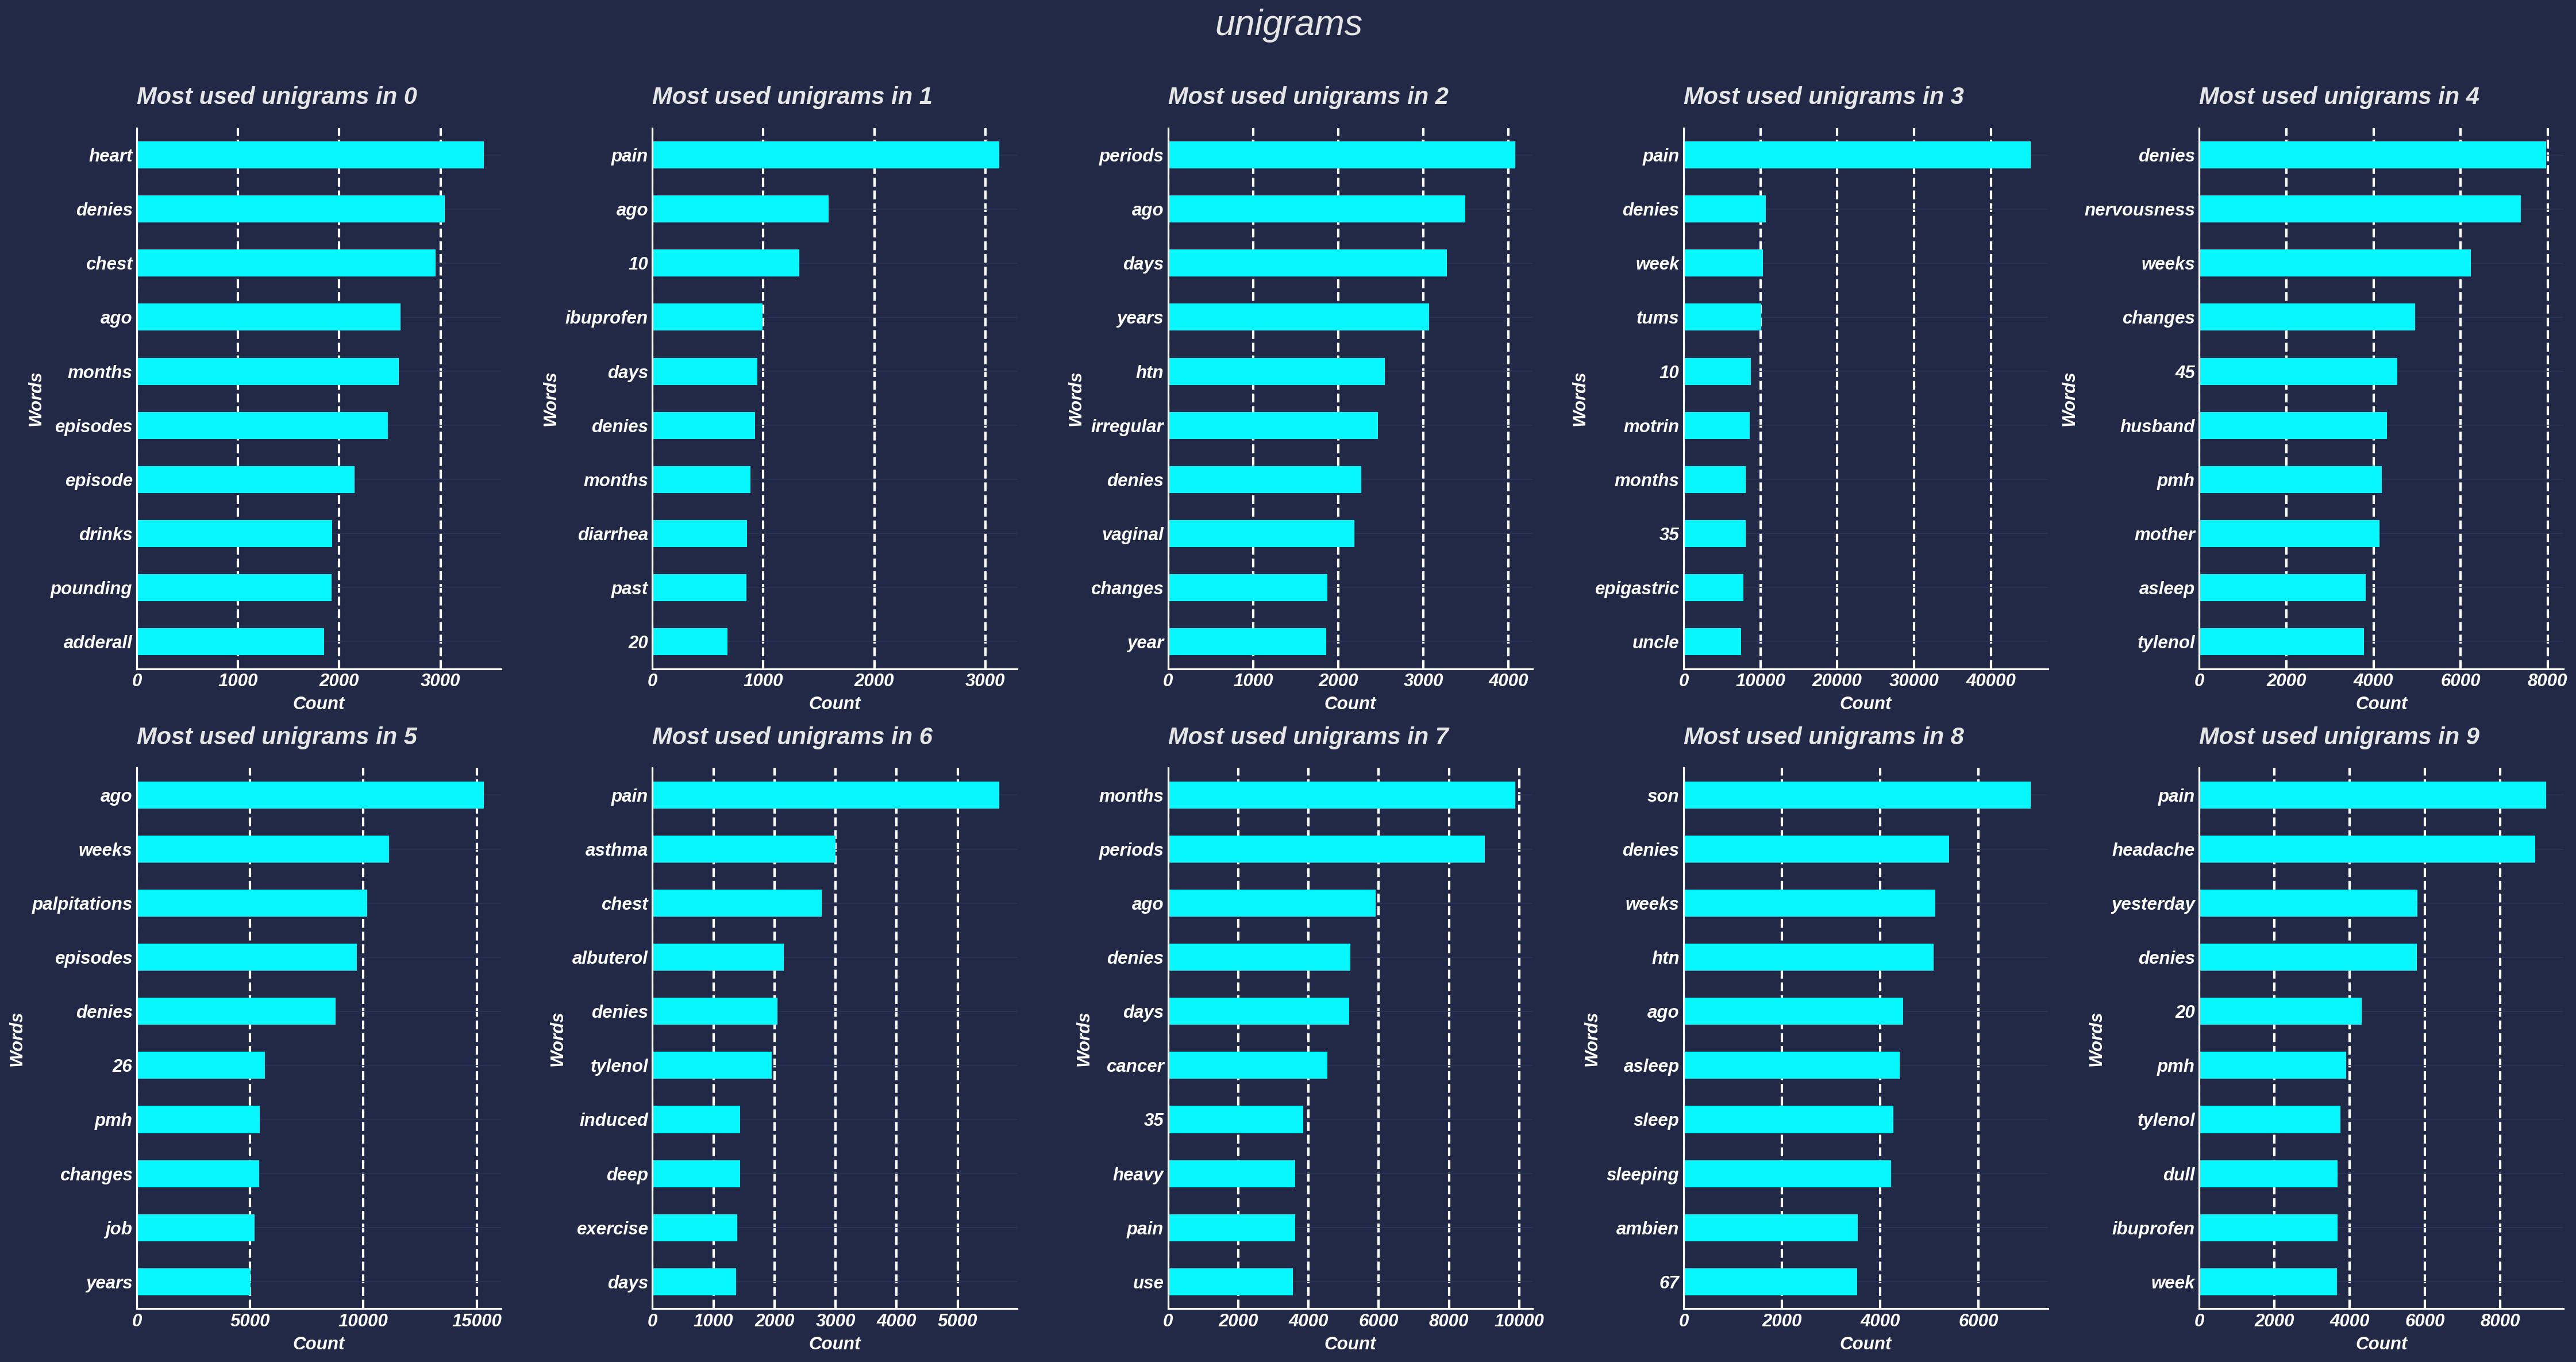

In [ ]:

# unigram plot
plot_ngram(unigrams)

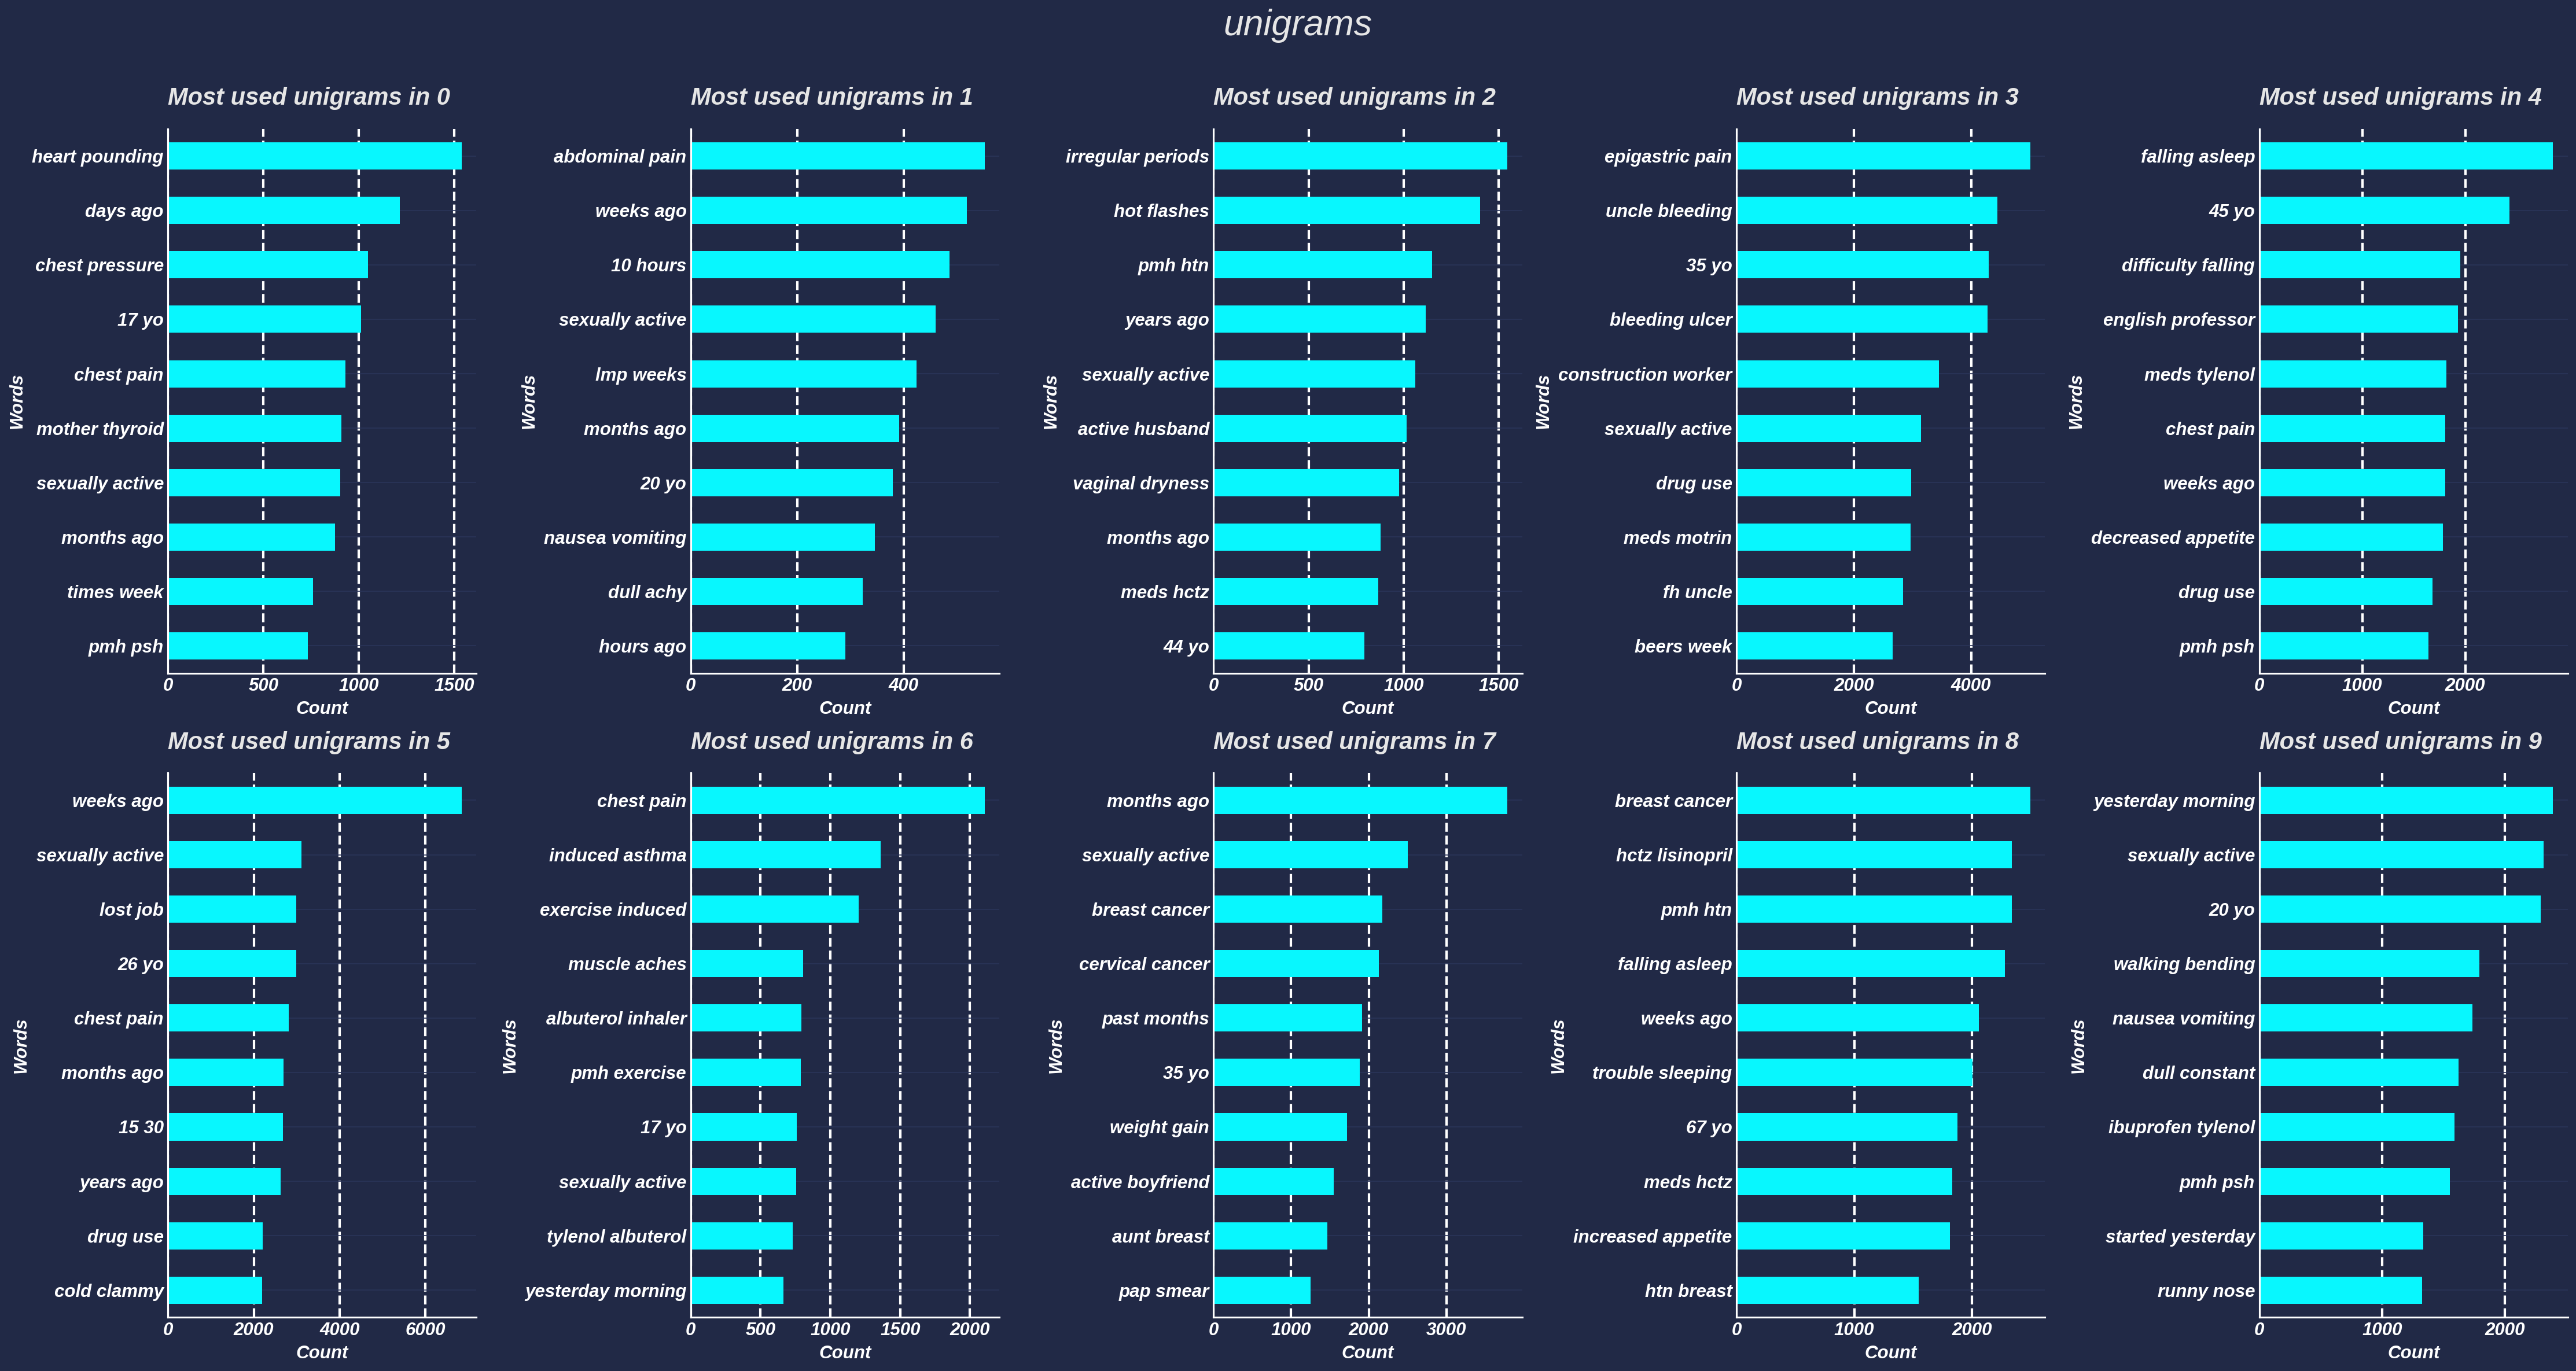

In [ ]:

# bigram plot
plot_ngram(bigrams)

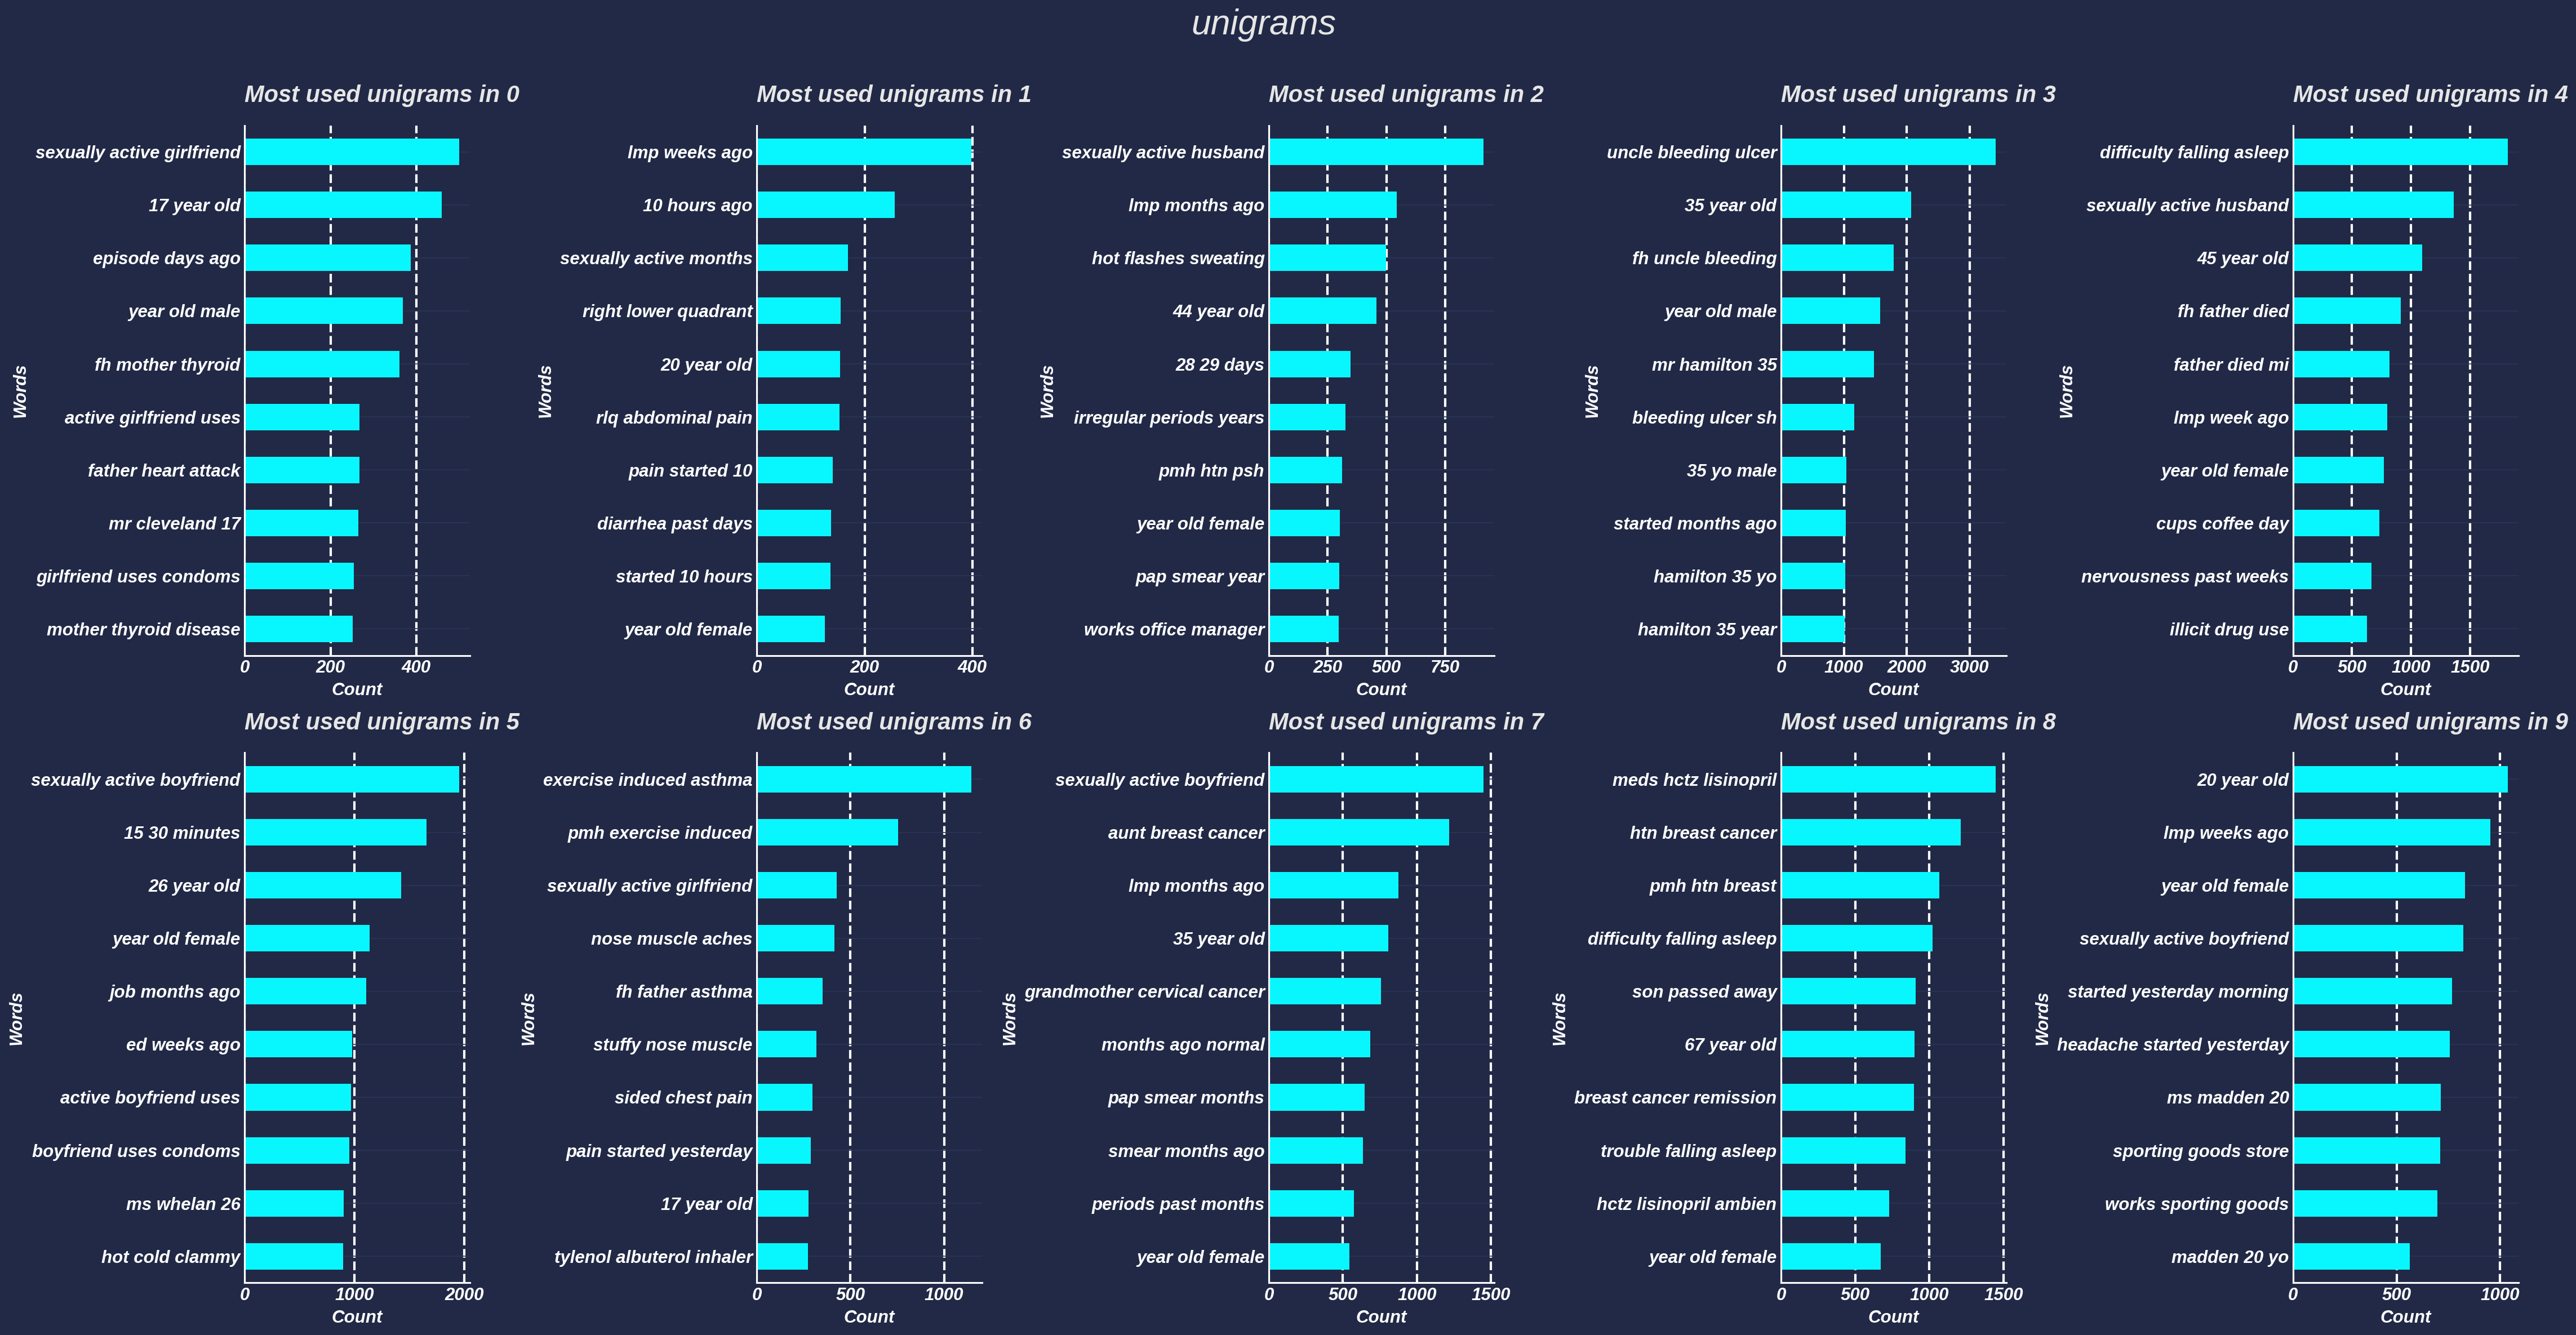

In [ ]:


# trigram plot
plot_ngram(trigrams)

In [ ]:
# done

# catatan pasien yang buruk

In [ ]:
train

,id,case_num,pn_num,feature_num,annotation,location
0,00016_000,0,16,0,['dad with recent heart attcak'],['696 724']
1,00016_001,0,16,1,"['mom with ""thyroid disease']",['668 693']
2,00016_002,0,16,2,['chest pressure'],['203 217']
3,00016_003,0,16,3,"['intermittent episodes', 'episode']","['70 91', '176 183']"
4,00016_004,0,16,4,['felt as if he were going to pass out'],['222 258']
...,...,...,...,...,...,...
14295,95333_912,9,95333,912,[],[]
14296,95333_913,9,95333,913,[],[]
14297,95333_914,9,95333,914,['photobia'],['274 282']
14298,95333_915,9,95333,915,['no sick contacts'],['421 437']
